In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import os
import statistics
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from   plotly.graph_objs import *
import plotly.offline as pyo
pd.set_option("display.max_columns", None)

Using TensorFlow backend.


In [3]:
benign_datas = pd.read_pickle('/home/sdsra/Downloads/CTU-13-Dataset/benign/datas-final-by-origin-tool.pkl')
malware_datas = pd.read_pickle('/home/sdsra/Downloads/CTU-13-Dataset/malware/1/datas-by-origin-tool.pkl')
for i in [2,3,4,5,6,7,8,9,10,11,12,13,42,43,44,45,46,47,48,49,50,52,53,54]:
    pkl_path = '/home/sdsra/Downloads/CTU-13-Dataset/malware/{}/datas-by-origin-tool.pkl'.format(str(i))
    if os.path.exists(pkl_path):
        tmp_data = pd.read_pickle(pkl_path)
        malware_datas = pd.concat([malware_datas, tmp_data], ignore_index=True)

In [4]:
benign_datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6312 entries, 0 to 6311
Data columns (total 32 columns):
amount_diff_cert                6312 non-null int64
avg_of_cert_length              6312 non-null float64
avg_of_duration                 6312 non-null float64
avg_of_public_key               6312 non-null float64
avg_periodicity                 6312 non-null float64
dst_ip                          6312 non-null object
dst_port                        6312 non-null object
get_SNI_equal_Dst_IP            6312 non-null int64
inbound_pckts                   6312 non-null int64
is_CNs_in_SNA_dns               6312 non-null int64
is_SNIs_in_SNA_dns              6312 non-null int64
is_valid_cert                   6312 non-null int64
number_of_cert_path             6312 non-null float64
number_of_domains               6312 non-null float64
number_of_flows                 6312 non-null int64
outbound_pckts                  6312 non-null int64
percent_of_established_stats    6312 non-null f

In [5]:
malware_datas = malware_datas[malware_datas['label']=='botnet']

In [6]:
malware_datas['label'].value_counts()

botnet    599
Name: label, dtype: int64

In [7]:
train_benign_datas, test_benign_datas = train_test_split(benign_datas, test_size=0.33, random_state=42)

In [8]:
train_benign_datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4229 entries, 3606 to 860
Data columns (total 32 columns):
amount_diff_cert                4229 non-null int64
avg_of_cert_length              4229 non-null float64
avg_of_duration                 4229 non-null float64
avg_of_public_key               4229 non-null float64
avg_periodicity                 4229 non-null float64
dst_ip                          4229 non-null object
dst_port                        4229 non-null object
get_SNI_equal_Dst_IP            4229 non-null int64
inbound_pckts                   4229 non-null int64
is_CNs_in_SNA_dns               4229 non-null int64
is_SNIs_in_SNA_dns              4229 non-null int64
is_valid_cert                   4229 non-null int64
number_of_cert_path             4229 non-null float64
number_of_domains               4229 non-null float64
number_of_flows                 4229 non-null int64
outbound_pckts                  4229 non-null int64
percent_of_established_stats    4229 non-null

In [9]:
test_benign_datas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 6080 to 4986
Data columns (total 32 columns):
amount_diff_cert                2083 non-null int64
avg_of_cert_length              2083 non-null float64
avg_of_duration                 2083 non-null float64
avg_of_public_key               2083 non-null float64
avg_periodicity                 2083 non-null float64
dst_ip                          2083 non-null object
dst_port                        2083 non-null object
get_SNI_equal_Dst_IP            2083 non-null int64
inbound_pckts                   2083 non-null int64
is_CNs_in_SNA_dns               2083 non-null int64
is_SNIs_in_SNA_dns              2083 non-null int64
is_valid_cert                   2083 non-null int64
number_of_cert_path             2083 non-null float64
number_of_domains               2083 non-null float64
number_of_flows                 2083 non-null int64
outbound_pckts                  2083 non-null int64
percent_of_established_stats    2083 non-nul

In [10]:
numeric_columns = list(filter(lambda x: x not in ['src_ip','src_port','dst_ip','dst_port','proto'], benign_datas.columns))
minMaxScaler = MinMaxScaler()
npScaled = minMaxScaler.fit_transform(train_benign_datas[numeric_columns])

/home/sdsra/anaconda3/envs/gep-gpu/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



In [11]:
train_benign_datas[numeric_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4229 entries, 3606 to 860
Data columns (total 28 columns):
amount_diff_cert                4229 non-null int64
avg_of_cert_length              4229 non-null float64
avg_of_duration                 4229 non-null float64
avg_of_public_key               4229 non-null float64
avg_periodicity                 4229 non-null float64
get_SNI_equal_Dst_IP            4229 non-null int64
inbound_pckts                   4229 non-null int64
is_CNs_in_SNA_dns               4229 non-null int64
is_SNIs_in_SNA_dns              4229 non-null int64
is_valid_cert                   4229 non-null int64
number_of_cert_path             4229 non-null float64
number_of_domains               4229 non-null float64
number_of_flows                 4229 non-null int64
outbound_pckts                  4229 non-null int64
percent_of_established_stats    4229 non-null float64
percent_of_stdev_duration       4229 non-null float64
ratio_of_SNI_ssl                4229 non-nu

In [12]:
# 3. Model
X = npScaled
input_flow = Input(shape=(28, ))
encoded = Dense(20, activation='relu')(input_flow)
encoded = Dense(14, activation='relu')(input_flow)
encoded = Dense(10, activation='relu')(encoded)
decoded = Dense(14, activation='relu')(encoded)
decoded = Dense(20, activation='relu')(decoded)
decoded = Dense(28, activation='sigmoid')(decoded)
autoencoder = Model(input_flow, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(X, X,
                epochs=100,
                batch_size=50,
                shuffle=True,
                validation_split=0.1,
                verbose=0)

In [13]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 14)                406       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                150       
_________________________________________________________________
dense_4 (Dense)              (None, 14)                154       
_________________________________________________________________
dense_5 (Dense)              (None, 20)                300       
_________________________________________________________________
dense_6 (Dense)              (None, 28)                588       
Total params: 1,598
Trainable params: 1,598
Non-trainable params: 0
_________________________________________________________________


In [14]:
df_history = pd.DataFrame(history.history)

In [15]:
def train_validation_loss(df_history):
    
    trace = []
    
    for label, loss in zip(['Train', 'Validation'], ['loss', 'val_loss']):
        trace0 = {'type' : 'scatter', 
                  'x'    : df_history.index.tolist(),
                  'y'    : df_history[loss].tolist(),
                  'name' : label,
                  'mode' : 'lines'
                  }
        trace.append(trace0)
    data = Data(trace)
    layout = {'title' : 'Model train-vs-validation loss', 'titlefont':{'size' : 30},
              'xaxis' : {'title':  '<b> Epochs', 'titlefont':{ 'size' : 25}},
              'yaxis' : {'title':  '<b> Loss', 'titlefont':{ 'size' : 25}},
              }
    fig = Figure(data = data, layout = layout)
    return pyo.iplot(fig)

In [16]:
train_validation_loss(df_history)

/home/sdsra/anaconda3/envs/gep-gpu/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [17]:
scaled_test_benign = minMaxScaler.fit_transform(test_benign_datas[numeric_columns])
test_benign_predict = autoencoder.predict(scaled_test_benign)

/home/sdsra/anaconda3/envs/gep-gpu/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



In [18]:
compare_benign = (scaled_test_benign - test_benign_predict) ** 2

In [19]:
compare_benign

array([[6.22452019e-03, 2.32417837e-03, 7.26387938e-04, ...,
        1.26597081e-02, 3.52847426e-05, 1.12819440e-06],
       [3.25405307e-02, 1.50225569e-04, 2.17526111e-03, ...,
        8.43585576e-03, 2.67300531e-03, 2.14282834e-03],
       [1.21429339e-02, 4.61865656e-04, 6.97005714e-05, ...,
        1.19920511e-03, 5.89571233e-05, 1.86438163e-05],
       ...,
       [1.01213562e-02, 1.83199800e-03, 8.98050106e-04, ...,
        9.73649623e-03, 2.51518049e-05, 1.96205016e-06],
       [1.49551540e-02, 2.74724117e-03, 5.65713736e-05, ...,
        8.12607927e-03, 1.09881325e-05, 1.52198679e-07],
       [2.78406731e-02, 2.71485963e-05, 2.26056471e-03, ...,
        9.40133962e-07, 3.83924003e-05, 1.97089571e-05]])

In [20]:
compare_benign_datas = test_benign_datas.copy()

In [21]:
compare_benign_datas['SUM'] = np.sum(compare_benign_datas, axis=1)

In [22]:
compare_benign_datas['MEAN'] = np.mean(compare_benign_datas, axis=1)

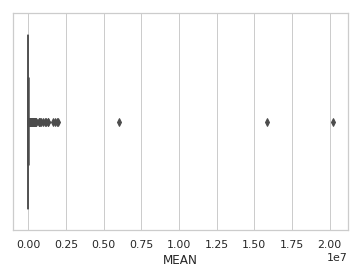

In [52]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=compare_benign_datas['MEAN'])

In [24]:
scaled_malware = minMaxScaler.fit_transform(malware_datas[numeric_columns])
test_malware = autoencoder.predict(scaled_malware)

/home/sdsra/anaconda3/envs/gep-gpu/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.



In [25]:
compare_malware = (scaled_malware - test_malware) ** 2

In [26]:
compare_malware_datas = malware_datas.copy()

In [27]:
compare_malware_datas['SUM'] = np.sum(compare_malware, axis=1)

In [28]:
compare_malware_datas['MEAN'] = np.mean(compare_malware, axis=1)

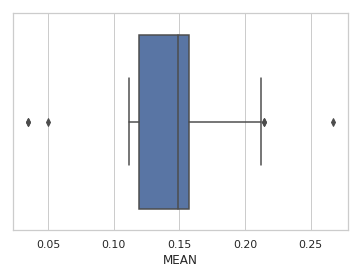

In [43]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=compare_malware_datas['MEAN'])

In [30]:
compare_malware_datas['SUM'].describe()

count    599.000000
mean       3.967045
std        0.595091
min        0.974225
25%        3.344501
50%        4.176173
75%        4.397215
max        7.472809
Name: SUM, dtype: float64

In [51]:
np.mean(compare_benign_datas['MEAN'])

40651.12586433384

In [48]:
threshold = 0.2

In [49]:
len(compare_benign_datas[compare_benign_datas['MEAN'] > threshold])

2083

In [33]:
compare_benign_datas[compare_benign_datas['SUM'] <= 3].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 34 columns):
amount_diff_cert                0 non-null int64
avg_of_cert_length              0 non-null float64
avg_of_duration                 0 non-null float64
avg_of_public_key               0 non-null float64
avg_periodicity                 0 non-null float64
dst_ip                          0 non-null object
dst_port                        0 non-null object
get_SNI_equal_Dst_IP            0 non-null int64
inbound_pckts                   0 non-null int64
is_CNs_in_SNA_dns               0 non-null int64
is_SNIs_in_SNA_dns              0 non-null int64
is_valid_cert                   0 non-null int64
number_of_cert_path             0 non-null float64
number_of_domains               0 non-null float64
number_of_flows                 0 non-null int64
outbound_pckts                  0 non-null int64
percent_of_established_stats    0 non-null float64
percent_of_stdev_duration       0 non-null float64
ratio_o